 ## Detecting malicious URLs using an autoencoder neural network

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras import regularizers
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np
import tensorflow as tf
import sys
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)


- The dataset we are going to use is retrieved from Kaggle. It contains a list of 420465 URLs with good/bad labels to mention if the concerned URL is malicious or not. We will use only the 'good' URLs to train the autoencoder. And since it will be exciting to check if our model is working we will use both good and bad URLs for testing. 80% of data will be used for training the model after keeping only the normal cases and 20% will be used for testing.

In [2]:

df = pd.read_csv("url_enriched_data.csv")

# Dimension of the dataset
print(df.shape)

# Missing values
print(df.isnull().values.any())

frauds = df[df.label == 1]
normal = df[df.label == 0]

print(frauds.shape)

data = df.drop(['domain'], axis=1)
print(data.shape)
X_train, X_test = train_test_split(data, test_size=0.2)

# Take only the normal cases
X_train = X_train[X_train.label == 0]
X_train = X_train.drop(['label'], axis=1)

y_test = X_test['label']
X_test = X_test.drop(['label'], axis=1)
X_train = X_train.values
X_test = X_test.values



(283711, 7)
True
(51047, 7)
(283711, 6)


In [3]:
X_train.shape

(186133, 5)

In [4]:
X_test.shape

(56743, 5)

## Architecture of the autoencoder
- The used autoencoder contains in total 8 layers. The first three layers are used for encoding, the middle one as 'code' layer and the last three ones are used for decoding.

In [5]:
input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='tanh')(encoder)
decoder = Dense(int(encoding_dim-2), activation='tanh')(code)

decoder = Dense(int(encoding_dim), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)



![Trace](plt.png)

### Model training
- The following lines are used to train the autoencoder. We are suing 100 epochs with the batch size set to 60. The best model will be saved in model.h5 file.

In [6]:

autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
autoencoder.fit(X_train, X_train, epochs=100,verbose=1)
autoencoder.summary()

Epoch 1/100
5817/5817 [==============================] - 3s 527us/step - loss: 405.0165 - accuracy: 0.5129
Epoch 2/100
5817/5817 [==============================] - 3s 470us/step - loss: 128.4240 - accuracy: 0.9991
Epoch 3/100
5817/5817 [==============================] - 3s 473us/step - loss: 52.7176 - accuracy: 0.9991
Epoch 4/100
5817/5817 [==============================] - 3s 513us/step - loss: 29.6956 - accuracy: 0.9991
Epoch 5/100
5817/5817 [==============================] - 3s 473us/step - loss: 18.2957 - accuracy: 0.9991
Epoch 6/100
5817/5817 [==============================] - 3s 474us/step - loss: 12.9182 - accuracy: 0.9991
Epoch 7/100
5817/5817 [==============================] - 3s 477us/step - loss: 10.7388 - accuracy: 0.9991
Epoch 8/100
5817/5817 [==============================] - 3s 479us/step - loss: 9.4087 - accuracy: 0.9991
Epoch 9/100
5817/5817 [==============================] - 3s 474us/step - loss: 8.6078 - accuracy: 0.9991
Epoch 10/100
5817/5817 [======================

5817/5817 [==============================] - 3s 543us/step - loss: 4.3645 - accuracy: 0.9992
Epoch 79/100
5817/5817 [==============================] - 4s 700us/step - loss: 4.3424 - accuracy: 0.9991
Epoch 80/100
5817/5817 [==============================] - 5s 821us/step - loss: 4.3374 - accuracy: 0.9993
Epoch 81/100
5817/5817 [==============================] - 4s 625us/step - loss: 4.3909 - accuracy: 0.9992
Epoch 82/100
5817/5817 [==============================] - 3s 516us/step - loss: 4.4175 - accuracy: 0.9992
Epoch 83/100
5817/5817 [==============================] - 3s 505us/step - loss: 4.3327 - accuracy: 0.9991
Epoch 84/100
5817/5817 [==============================] - 3s 572us/step - loss: 4.3375 - accuracy: 0.9991
Epoch 85/100
5817/5817 [==============================] - 3s 537us/step - loss: 4.3768 - accuracy: 0.9992
Epoch 86/100
5817/5817 [==============================] - 5s 776us/step - loss: 4.3445 - accuracy: 0.9991
Epoch 87/100
5817/5817 [==============================] - 3

In [13]:
#autoencoder.

TypeError: 'str' object is not callable

In [6]:

#nb_epoch = 100
#batch_size = 60

#autoencoder.compile(optimizer='adam',
 #                   loss='mean_squared_error',
  #                  metrics=['accuracy'])

#checkpointer = ModelCheckpoint(filepath="model.h5", verbose=0, save_best_only=True)
#tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)
#history = autoencoder.fit(X_train, X_train, epochs=nb_epoch, batch_size=batch_size, shuffle=True, validation_data=(X_test, X_test), verbose=1, callbacks=[checkpointer, tensorboard]).history


Epoch 1/100
   1/3104 [..............................] - ETA: 0s - loss: 752.7172 - accuracy: 0.0167WARNING:tensorflow:From /Users/amimalli/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
3104/3104 [==============================] - 2s 752us/step - loss: 463.1688 - accuracy: 0.9664 - val_loss: 445.8077 - val_accuracy: 0.9993
Epoch 2/100
3104/3104 [==============================] - 2s 549us/step - loss: 240.6250 - accuracy: 0.9990 - val_loss: 291.2854 - val_accuracy: 0.9993
Epoch 3/100
3104/3104 [==============================] - 2s 560us/step - loss: 134.3071 - accuracy: 0.9990 - val_loss: 208.1498 - val_accuracy: 0.9993
Epoch 4/100
3104/3104 [==============================] - 2s 622us/step - loss: 77.7550 - accuracy: 0.9990 - val_loss: 156.6268 - val_accuracy: 0.9993
Epoch 5/100


In [ ]:
autoencoder.summary()

### Prediction and error calculation

In [7]:
#autoencoder = load_model('model.h5')
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,'true_class': y_test})
fraud_error_df = error_df[error_df['true_class'] == 1]



In [15]:
import seaborn as sns

In [ ]:
#threshold = np.mean(mse) +  (3 * np.std(mse))


### Finding the best threshold
- In order to find the threshold that provide the best results, we are using the following loop. It keep rising the threshold until attending the wanted accuracy. In this case we are trying to attend 0.6 of accuracy and 0.5 of recall.

In [19]:
threshold=0
f1=0
recall=0
accuracy=0
iterations = 10000
while (recall < 0.5 or accuracy < 0.6):
    if iterations == 0:
        break
    print('**************************')
    print(threshold)
    threshold+=.005
    y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
    conf_matrix = confusion_matrix(error_df.true_class, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    precision = 1.*tp/(tp+fp)
    recall = 1.*tp/(tp+fn)
    f1=(2*recall*precision)/(recall+precision)
    print('TP:'+str(tp))
    print('FP:'+str(fp))
    print('TN:'+str(tn))
    print('FN:'+str(fn))
    accuracy=1.*(tp+tn)/(tp+tn+fp+fn)
    print('Accuracy:'+str(accuracy))
    print('Precision:'+str(precision))
    print('Recall:'+str(recall))
    print('F1:'+str(f1))



**************************
0
TP:10290
FP:46453
TN:0
FN:0
Accuracy:0.1813439543203567
Precision:0.1813439543203567
Recall:1.0
F1:0.30701296376411613
**************************
0.005
TP:10290
FP:46453
TN:0
FN:0
Accuracy:0.1813439543203567
Precision:0.1813439543203567
Recall:1.0
F1:0.30701296376411613
**************************
0.01
TP:10290
FP:46447
TN:6
FN:0
Accuracy:0.1814496942354123
Precision:0.1813631316424908
Recall:1.0
F1:0.30704044638727673
**************************
0.015
TP:10290
FP:46440
TN:13
FN:0
Accuracy:0.18157305746964383
Precision:0.18138551031200423
Recall:1.0
F1:0.30707251566696503
**************************
0.02
TP:10290
FP:46419
TN:34
FN:0
Accuracy:0.18194314717233845
Precision:0.18145267946886737
Recall:1.0
F1:0.30716876371289126
**************************
0.025
TP:10289
FP:46384
TN:69
FN:1
Accuracy:0.18254234002432018
Precision:0.18155029731971134
Recall:0.9999028182701653
F1:0.3073040335707779
**************************
0.030000000000000002
TP:10289
FP:46349
TN:10

TP:9463
FP:40607
TN:5846
FN:827
Accuracy:0.2697953932643674
Precision:0.1889954064309966
Recall:0.9196307094266278
F1:0.31355202120609676
**************************
0.24000000000000013
TP:9425
FP:40369
TN:6084
FN:865
Accuracy:0.27332005709955415
Precision:0.18927983291159578
Recall:0.9159378036929058
F1:0.31372744823913185
**************************
0.24500000000000013
TP:9398
FP:40157
TN:6296
FN:892
Accuracy:0.2765803711471018
Precision:0.18964786600746644
Recall:0.9133138969873664
F1:0.31407803492355246
**************************
0.2500000000000001
TP:9380
FP:39988
TN:6465
FN:910
Accuracy:0.2792414923426678
Precision:0.1900016204829039
Recall:0.9115646258503401
F1:0.3144590834422877
**************************
0.2550000000000001
TP:9352
FP:39855
TN:6598
FN:938
Accuracy:0.28109194085614087
Precision:0.19005426057268274
Recall:0.908843537414966
F1:0.31436879170378335
**************************
0.2600000000000001
TP:9333
FP:39707
TN:6746
FN:957
Accuracy:0.2833653490298363
Precision:0.190

TP:8412
FP:33858
TN:12595
FN:1878
Accuracy:0.370213065928837
Precision:0.19900638750887154
Recall:0.8174927113702624
F1:0.3200913242009133
**************************
0.4750000000000003
TP:8399
FP:33788
TN:12665
FN:1891
Accuracy:0.37121759512186525
Precision:0.199089766989831
Recall:0.81622934888241
F1:0.32010213998513637
**************************
0.4800000000000003
TP:8384
FP:33699
TN:12754
FN:1906
Accuracy:0.37252172074088435
Precision:0.19922534039873582
Recall:0.8147716229348883
F1:0.3201649705000668
**************************
0.4850000000000003
TP:8363
FP:33607
TN:12846
FN:1927
Accuracy:0.3737729764023756
Precision:0.19926137717417203
Recall:0.8127308066083576
F1:0.3200535782625335
**************************
0.4900000000000003
TP:8332
FP:33498
TN:12955
FN:1958
Accuracy:0.37514759529809844
Precision:0.1991871862299785
Recall:0.8097181729834791
F1:0.3197237145049885
**************************
0.49500000000000033
TP:8318
FP:33439
TN:13014
FN:1972
Accuracy:0.37594064466101546
Precisio

TP:7601
FP:29781
TN:16672
FN:2689
Accuracy:0.4277708263574362
Precision:0.20333315499438231
Recall:0.7386783284742469
F1:0.3188873972142977
**************************
0.6950000000000005
TP:7585
FP:29686
TN:16767
FN:2705
Accuracy:0.42916306857233494
Precision:0.20350943092484775
Recall:0.7371234207968902
F1:0.31895881079035343
**************************
0.7000000000000005
TP:7573
FP:29603
TN:16850
FN:2717
Accuracy:0.4304143242338262
Precision:0.20370669248977835
Recall:0.7359572400388726
F1:0.31909156027472296
**************************
0.7050000000000005
TP:7555
FP:29488
TN:16965
FN:2735
Accuracy:0.43212378619389175
Precision:0.20395216370164404
Recall:0.7342079689018465
F1:0.3192276001943676
**************************
0.7100000000000005
TP:7537
FP:29399
TN:17054
FN:2753
Accuracy:0.43337504185538306
Precision:0.20405566385098547
Recall:0.7324586977648202
F1:0.31918858256045396
**************************
0.7150000000000005
TP:7526
FP:29335
TN:17118
FN:2764
Accuracy:0.4343090777717075
Pr

TP:6963
FP:26593
TN:19860
FN:3327
Accuracy:0.4727102902560668
Precision:0.20750387412087257
Recall:0.6766763848396501
F1:0.31761164074259907
**************************
0.9150000000000007
TP:6948
FP:26539
TN:19914
FN:3342
Accuracy:0.47339759970392825
Precision:0.20748350106011287
Recall:0.6752186588921283
F1:0.3174269593622222
**************************
0.9200000000000007
TP:6931
FP:26482
TN:19971
FN:3359
Accuracy:0.47410253247096557
Precision:0.20743423218507767
Recall:0.6735665694849369
F1:0.3171864631718646
**************************
0.9250000000000007
TP:6919
FP:26435
TN:20018
FN:3371
Accuracy:0.4747193486421233
Precision:0.2074413863404689
Recall:0.6724003887269193
F1:0.3170653468976262
**************************
0.9300000000000007
TP:6915
FP:26385
TN:20068
FN:3375
Accuracy:0.4755300213242162
Precision:0.20765765765765765
Recall:0.6720116618075802
F1:0.31727460426703374
**************************
0.9350000000000007
TP:6903
FP:26325
TN:20128
FN:3387
Accuracy:0.476375940644661
Precis

TP:6430
FP:23908
TN:22545
FN:3860
Accuracy:0.5106356731226759
Precision:0.21194541499110028
Recall:0.6248785228377065
F1:0.3165304715959437
**************************
1.1549999999999974
TP:6427
FP:23867
TN:22586
FN:3863
Accuracy:0.5113053592513614
Precision:0.2121542219581435
Recall:0.6245869776482021
F1:0.3167258032722255
**************************
1.1599999999999973
TP:6416
FP:23805
TN:22648
FN:3874
Accuracy:0.512204148529334
Precision:0.21230270341815294
Recall:0.6235179786200195
F1:0.3167534743649873
**************************
1.1649999999999971
TP:6402
FP:23748
TN:22705
FN:3888
Accuracy:0.5129619512538992
Precision:0.21233830845771146
Recall:0.6221574344023324
F1:0.3166172106824926
**************************
1.169999999999997
TP:6391
FP:23694
TN:22759
FN:3899
Accuracy:0.5137197539784643
Precision:0.21243144424131627
Recall:0.6210884353741497
F1:0.3165820433436533
**************************
1.174999999999997
TP:6382
FP:23647
TN:22806
FN:3908
Accuracy:0.5143894401071498
Precision:0.

TP:6021
FP:21901
TN:24552
FN:4269
Accuracy:0.5387977371658178
Precision:0.21563641572953227
Recall:0.585131195335277
F1:0.31513660630168533
**************************
1.3849999999999925
TP:6017
FP:21853
TN:24600
FN:4273
Accuracy:0.5395731632095588
Precision:0.21589522784355938
Recall:0.5847424684159378
F1:0.31535639412997907
**************************
1.3899999999999924
TP:6012
FP:21798
TN:24655
FN:4278
Accuracy:0.5404543291683556
Precision:0.2161812297734628
Recall:0.5842565597667638
F1:0.31559055118110235
**************************
1.3949999999999922
TP:6008
FP:21760
TN:24693
FN:4282
Accuracy:0.5410535220203373
Precision:0.2163641601843849
Recall:0.5838678328474247
F1:0.31572862473067426
**************************
1.3999999999999921
TP:6005
FP:21732
TN:24721
FN:4285
Accuracy:0.5414941049997356
Precision:0.21649781879799546
Recall:0.5835762876579204
F1:0.31582822731217297
**************************
1.404999999999992
TP:5996
FP:21659
TN:24794
FN:4294
Accuracy:0.5426219974269954
Precisi

TP:5674
FP:19884
TN:26569
FN:4616
Accuracy:0.5682286801896269
Precision:0.22200485170983644
Recall:0.5514091350826045
F1:0.31655880383842894
**************************
1.6149999999999876
TP:5667
FP:19848
TN:26605
FN:4623
Accuracy:0.5687397564457289
Precision:0.22210464432686655
Recall:0.5507288629737609
F1:0.31654796816087144
**************************
1.6199999999999875
TP:5654
FP:19821
TN:26632
FN:4636
Accuracy:0.5689864829141921
Precision:0.22194308145240432
Recall:0.5494655004859087
F1:0.31617503145533343
**************************
1.6249999999999873
TP:5648
FP:19795
TN:26658
FN:4642
Accuracy:0.5693389492977108
Precision:0.22198640097472783
Recall:0.5488824101068999
F1:0.3161223518876109
**************************
1.6299999999999872
TP:5638
FP:19774
TN:26679
FN:4652
Accuracy:0.569532805808646
Precision:0.22186368644734772
Recall:0.547910592808552
F1:0.31583664780684556
**************************
1.6349999999999871
TP:5627
FP:19727
TN:26726
FN:4663
Accuracy:0.5701672452989797
Precis

TP:5365
FP:18331
TN:28122
FN:4925
Accuracy:0.5901520892444883
Precision:0.22640952059419311
Recall:0.5213799805636541
F1:0.31571823692108514
**************************
1.8449999999999827
TP:5362
FP:18244
TN:28209
FN:4928
Accuracy:0.5916324480552667
Precision:0.2271456409387444
Recall:0.5210884353741496
F1:0.31637951380693885
**************************
1.8499999999999825
TP:5354
FP:18211
TN:28242
FN:4936
Accuracy:0.592073031034665
Precision:0.22720135794610652
Recall:0.5203109815354713
F1:0.31629006055235565
**************************
1.8549999999999824
TP:5350
FP:18170
TN:28283
FN:4940
Accuracy:0.5927250938441746
Precision:0.2274659863945578
Recall:0.5199222546161322
F1:0.31647441585329783
**************************
1.8599999999999823
TP:5346
FP:18115
TN:28338
FN:4944
Accuracy:0.5936238831221472
Precision:0.2278675248284387
Recall:0.519533527696793
F1:0.3167906136114485
**************************
1.8649999999999822
TP:5341
FP:18085
TN:28368
FN:4949
Accuracy:0.5940644661015456
Precision

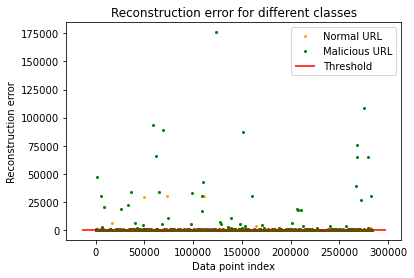

In [20]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=2, linestyle='',
            label= "Malicious URL" if name == 1 else "Normal URL", color= 'green' if name == 1 else 'orange')
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="red", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

- This figure represents all the points with the threshold 
- Zooming the area above the threshold (malicious URLs)
- Zooming on the area below the threshold (normal URLs)
- This represents the following results: Accuracy: 60%, Precision: 22.62%, Recall: 50.42%.

- Although we haven't got an excellent prediction result with the built model, this experiment showed that using autoencoders could be a good fit when it is about unlabelled datasets, especially in cybersecurity contexts where early anomalies detection is a real key for a proactive approache. The threshold could be adapted to the problem you are trying to solve, it should be calculated according to if recall is important for you or a good global accuracy is enough

In [21]:
threshold

1.919999999999981

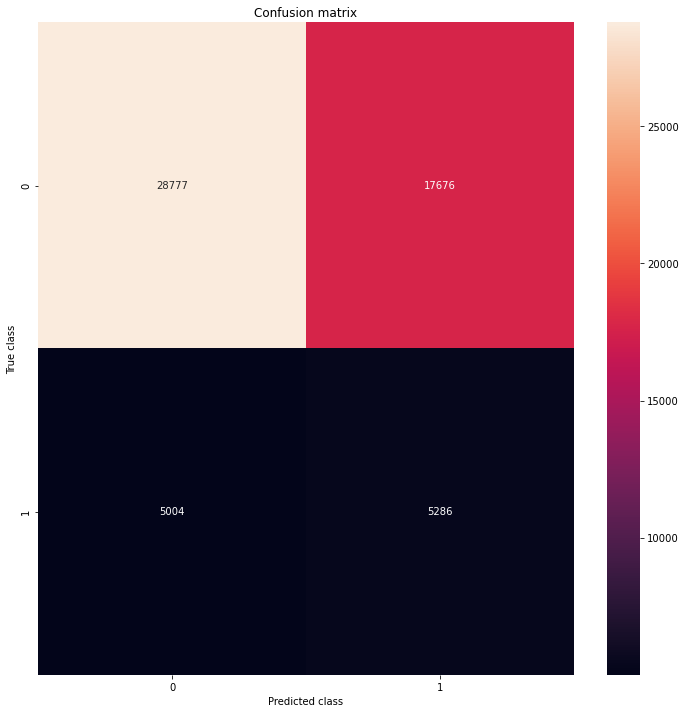

In [23]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

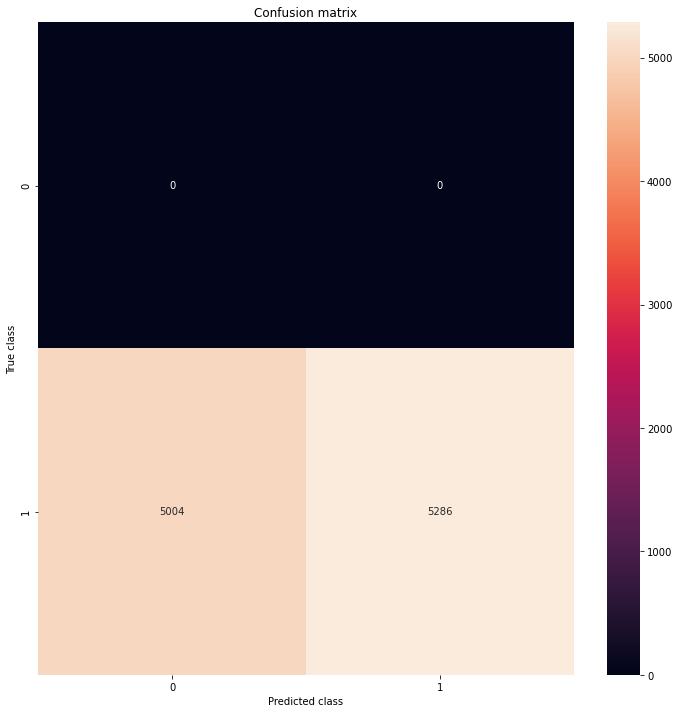

In [22]:
y_pred = [1 if e > threshold else 0 for e in fraud_error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(fraud_error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()